In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf

from pathlib import Path
from dechorate import constants

# Load Book clap

(49152, 31)


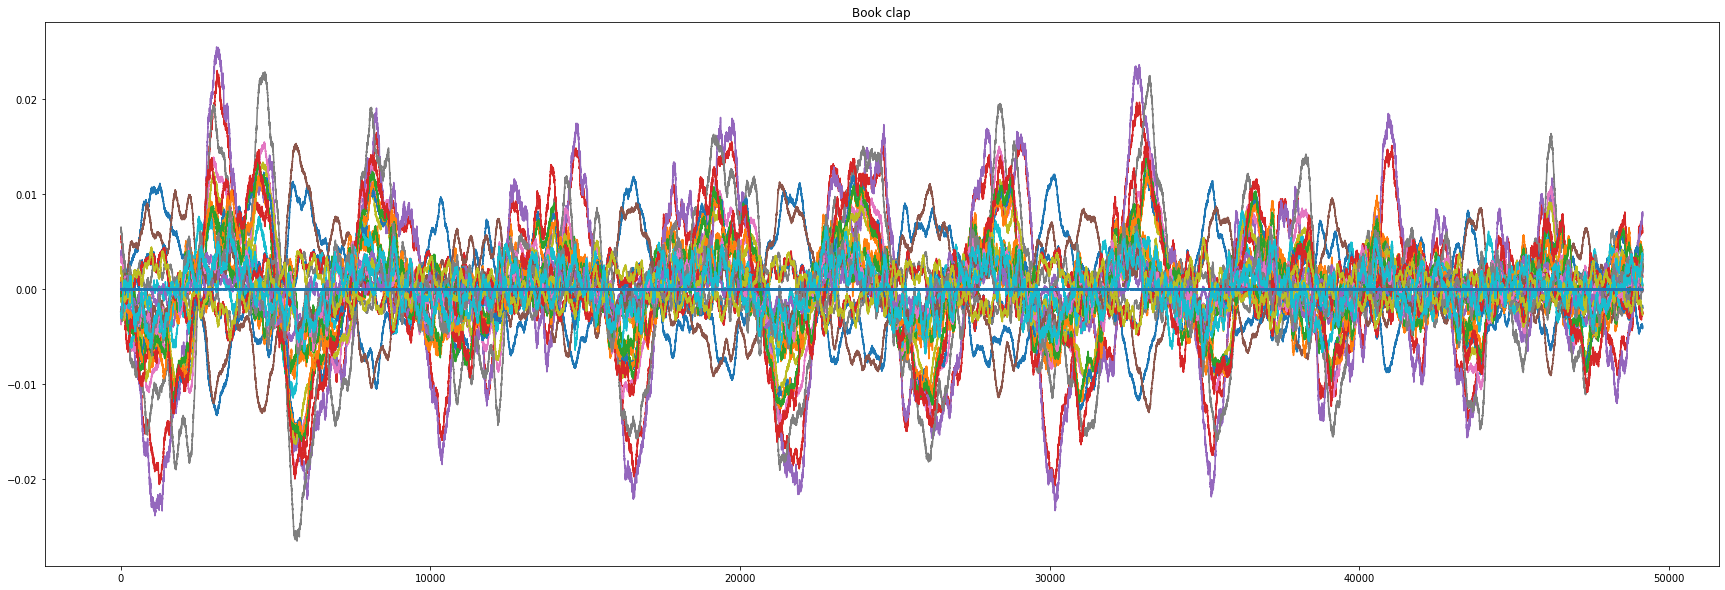

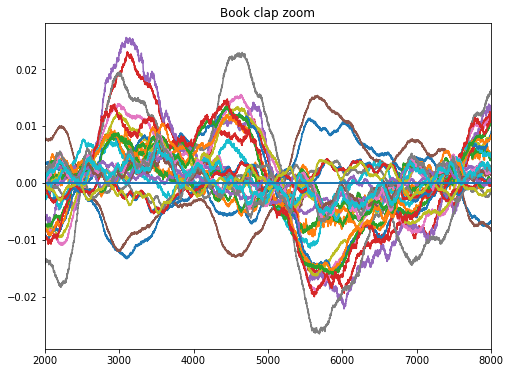

In [4]:
path_to_file = Path('/home/chutlhu/Documents/Datasets/dEchorate/raw/2020-01-21__18-43-13_book_polarity.wav')
wav, Fs = sf.read(path_to_file)

print(wav.shape)

fig = plt.figure(figsize=(30,10))
plt.title('Book clap')
plt.plot(wav)
plt.show()

fig = plt.figure(figsize=(8,6))
plt.title('Book clap zoom')
plt.plot(wav)
plt.xlim([2000, 8000])
plt.show()

# Load Silence

In [5]:
signal = 'silence'

path_to_hdf = Path('..', f'dEchorate_{signal}.hdf5')
dset = h5py.File(path_to_hdf, mode='r')

signals = list(dset.keys())
print('Signals', signals)
signal = signals[0]

rooms = list(dset[signals[0]].keys())
print('Rooms', rooms)

sources = list(dset[signals[0]][rooms[0]].keys())
print('Sources', sources)

for room in rooms:

    srcs = list(dset[signal][room])

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/{signal}/{room}/{src}'
        data = np.asarray(dset[group])
        
        if len(srcs) > 1:
            ax = axarr[s]
        else:
            ax = axarr
    
        time = np.arange(data.shape[0])/Fs
        ax.set_title(f'src: {src}')
        ax.plot(time, data[:,:-1])
        ax.plot(time, data[:,-1]-0.01, label='loopback')
        ax.set_ylim([-0.02, 0.02])
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(f'../figures/{signal}_{room}_{src}.png')
    plt.close()

dset.close()

Signals ['silence']
Rooms ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources ['99']


In [ ]:
signal = 'babble'

path_to_hdf = Path('..', f'dEchorate_{signal}.hdf5')
dset = h5py.File(path_to_hdf, mode='r')

signals = list(dset.keys())
print('Signals', signals)
signal = signals[0]

rooms = list(dset[signals[0]].keys())
print('Rooms', rooms)

sources = list(dset[signals[0]][rooms[0]].keys())
print('Sources', sources)

for room in rooms:

    srcs = list(dset[signal][room])

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/{signal}/{room}/{src}'
        data = np.asarray(dset[group])
        
        if len(srcs) > 1:
            ax = axarr[s]
        else:
            ax = axarr
    
        time = np.arange(data.shape[0])/Fs
        ax.set_title(f'src: {src}')
        ax.plot(time, data[:,:-1])
        ax.plot(time, data[:,-1]-0.01, label='loopback')
        ax.set_ylim([-0.5, 0.5])
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(f'../figures/{signal}_{room}_{src}.png')
    plt.close()

dset.close()

Signals ['babble']
Rooms ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources ['1', '2', '3', '4']


In [ ]:
signal = 'noise'

path_to_hdf = Path('..', f'dEchorate_{signal}.hdf5')
dset = h5py.File(path_to_hdf, mode='r')

signals = list(dset.keys())
print('Signals', signals)
signal = signals[0]

rooms = list(dset[signals[0]].keys())
print('Rooms', rooms)

sources = list(dset[signals[0]][rooms[0]].keys())
print('Sources', sources)

for room in rooms:

    srcs = list(dset[signal][room])

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/{signal}/{room}/{src}'
        data = np.asarray(dset[group])
        
        if len(srcs) > 1:
            ax = axarr[s]
        else:
            ax = axarr
    
        time = np.arange(data.shape[0])/Fs
        ax.set_title(f'src: {src}')
        ax.plot(time, data[:,:-1])
        ax.plot(time, data[:,-1]-0.01, label='loopback')
        ax.set_ylim([-0.5, 0.5])
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.savefig(f'../figures/{signal}_{room}_{src}.png')
    plt.close()

dset.close()

In [7]:
dset_chirp = h5py.File('../dEchorate_chirp.hdf5', mode='r')

Fs = constants['Fs']
L = 2*Fs
signal = 'chirp'
dset = dset_chirp

for room in rooms:

    print(room)

    srcs = list(dset[signal][room].keys())

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    
    plt.suptitle(room)
    for s, src in enumerate(srcs):

        group = f'/{signal}/{room}/{src}'
        data = np.asarray(dset[group])

        axarr[s].set_title(f'src: {src}')
        axarr[s].plot(100*data[::4,-1], alpha=0.5)
        # axarr[s].plot(data[:,:3])
        axarr[s].axvline(x=constants['recording_offset']//4)
        axarr[s].set_ylim([-0.025, 0.025])
        # axarr[s].set_xlim([0, 20*Fs])

    plt.tight_layout()
    plt.savefig(f'../figures/{signal}_{room}_{src}.png')
    plt.close()

000000
000001
000010
000100
001000
010000
011000
011100
011110
011111
020002


# Visualize RIRs

In [ ]:
L, I, J, D = rirs.shape
datasets = constants['datasets']

In [ ]:
j = 0
max_len = 8000

for i in range(I):
    delays = delay_df.loc[
        (delay_df['mic_id'] == i+1) & 
        (delay_df['src_id'] == j+1)
        ]['delay'].values
    delay = int(np.median(delays))
    print(i, j, d, delay)
    curr_rirs = rirs[delay:max_len, i, j, :]
    plt.plot(np.abs(curr_rirs))
    plt.show()

In [ ]:
plt.imshow(np.abs(curr_rirs).T, aspect='auto')

In [ ]:
h = rirs[:,0,0,5]
t = np.arange(len(h))/48000
plt.figure(figsize=(10,5))
plt.plot(t,np.abs(h))
plt.xlim([0.09, 0.40])
plt.savefig('rir.pdf')
plt.show()